In [1]:
!pip install -U linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.5 MB/s  0:00:00 eta 0:00:01
  Attempting uninstall: formulaic
    Found existing installation: formulaic 1.1.1
    Uninstalling formulaic-1.1.1:
      Successfully uninstalled formulaic-1.1.1
  Attempting uninstall: linearmodels━━━━━━━━━━━━ 0/2 [formulaic]
    Found existing installation: linearmodels 6.10/2 [formulaic]
    Uninstalling linearmodels-6.1:━━━━━━━━━━ 0/2 [formulaic]
      Successfully uninstalled linearmodels-6.1m 0/2 [formulaic]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [linearmodels] [linearmodels]


In [2]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

https://population.un.org/wpp/downloads?folder=Standard%20Projections&group=CSV%20format

## Life table

* mx: Central death rate, nmx, for the age interval (x, x+n)
* qx: Probability of dying (nqx), for an individual between age x and x+n
* px: Probability of surviving, (npx), for an individual of age x to age x+n
* lx: Number of survivors, (lx), at age (x) for 100000 births
* dx: Number of deaths, (ndx), between ages x and x+n
* Lx: Number of person-years lived, (nLx), between ages x and x+n
* Sx: Survival ratio (nSx) corresponding to proportion of the life table population in age group (x, x+n) who are alive n year later
* Tx: Person-years lived, (Tx), above age x
* ex: Expectation of life (ex) at age x, i.e., average number of years lived subsequent to age x by those reaching age x
* ax: Average number of years lived (nax) between ages x and x+n by those dying in the interval

# Life expectancy

In [3]:
df = pd.read_csv("data/WPP2024_Life_Table_Abridged_Medium_1950-2023.csv")
df.head()

,Unnamed: 0,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,...,mx,qx,px,lx,dx,Lx,Sx,Tx,ex,ax
0,1426128,64.0,108,NaN,BDI,BI,108.0,4.0,Country/Area,910.0,...,0.194889,0.172380,0.827620,100000.000,17238.006,88450.536,0.784065,3957135.380,39.5714,0.330000
1,1426129,64.0,108,NaN,BDI,BI,108.0,4.0,Country/Area,910.0,...,0.037163,0.136318,0.863682,82761.994,11281.953,303581.738,0.884273,3868684.844,46.7447,1.565471
2,1426130,64.0,108,NaN,BDI,BI,108.0,4.0,Country/Area,910.0,...,0.010471,0.050783,0.949217,71480.041,3629.942,346663.674,0.965459,3565103.106,49.8755,2.042231
3,1426131,64.0,108,NaN,BDI,BI,108.0,4.0,Country/Area,910.0,...,0.005268,0.025984,0.974016,67850.098,1762.998,334689.717,0.973323,3218439.432,47.4346,2.413056
4,1426132,64.0,108,NaN,BDI,BI,108.0,4.0,Country/Area,910.0,...,0.006097,0.030054,0.969946,66087.101,1986.188,325761.224,0.963598,2883749.715,43.6356,2.646607


In [4]:
df["ISO3_code"].unique()

array(['BDI', 'COM', 'DJI', 'ERI', 'ETH', 'KEN', 'MDG', 'MWI', 'MUS',
       'MYT', 'MOZ', 'REU', 'RWA', 'SYC', 'SOM', 'SSD', 'UGA', 'TZA',
       'ZMB', 'ZWE', 'AGO', 'CMR', 'CAF', 'TCD', 'COG', 'COD', 'GNQ',
       'GAB', 'STP', 'DZA', 'EGY', 'LBY', 'MAR', 'SDN', 'TUN', 'ESH',
       'BWA', 'SWZ', 'LSO', 'ZAF', 'BEN', 'BFA', 'CPV', 'CIV', 'GMB',
       'GHA', 'GIN', 'GNB', 'LBR', 'MLI', 'MRT', 'NER', 'NGA', 'SHN',
       'SEN', 'SLE', 'TGO', 'KAZ', 'KGZ', 'TJK', 'TKM', 'UZB', 'CHN',
       'HKG', 'MAC', 'TWN', 'PRK', 'JPN', 'MNG', 'KOR', 'AFG', 'BGD',
       'BTN', 'IND', 'IRN', 'MDV', 'NPL', 'PAK', 'LKA', 'BRN', 'KHM',
       'IDN', 'LAO', 'MYS', 'MMR', 'PHL', 'SGP', 'THA', 'TLS', 'VNM',
       'ARM', 'AZE', 'BHR', 'CYP', 'GEO', 'IRQ', 'ISR', 'JOR', 'KWT',
       'LBN', 'OMN', 'QAT', 'SAU', 'PSE', 'SYR', 'TUR', 'ARE', 'YEM',
       'BLR', 'BGR', 'CZE', 'HUN', 'POL', 'MDA', 'ROU', 'RUS', 'SVK',
       'UKR', 'DNK', 'EST', 'FRO', 'FIN', 'GGY', 'ISL', 'IRL', 'IMN',
       'JEY', 'LVA',

In [5]:
df["Sex"].unique()

array(['Male', 'Female', 'Total'], dtype=object)

In [6]:
df['AgeGrp'].unique()

array(['0', '1-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34',
       '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
       '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100+'],
      dtype=object)

In [9]:
df[
    (df["ISO3_code"] == "ARM")]["Time"]

439560    1950
439561    1950
439562    1950
439563    1950
439564    1950
          ... 
444439    2023
444440    2023
444441    2023
444442    2023
444443    2023
Name: Time, Length: 4884, dtype: int64

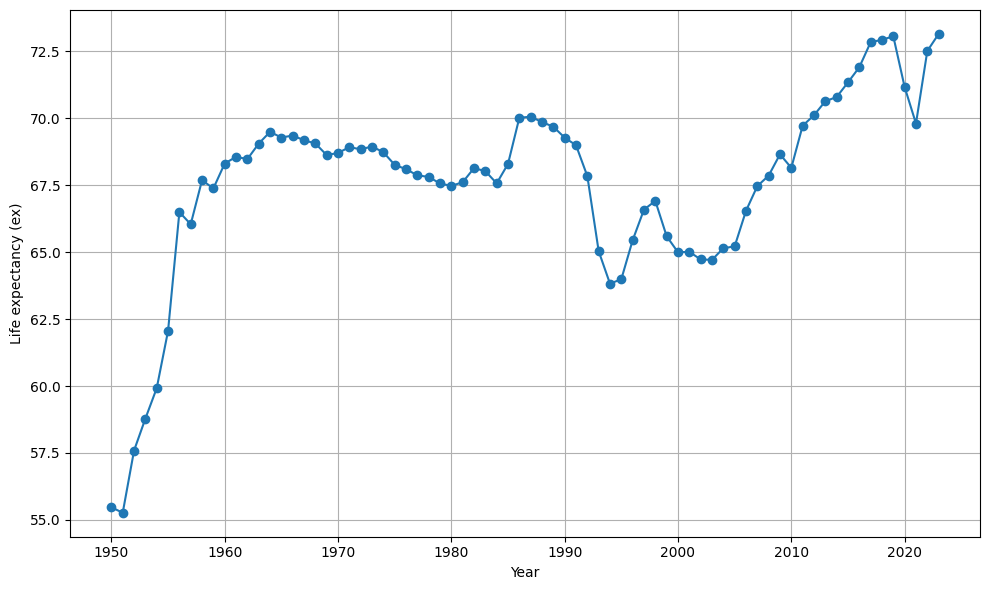

In [11]:
df_ex = df[
    (df["ISO3_code"] == "RUS") &
    (df['Sex'] == 'Total') &
    ((df['AgeGrpStart'] == 0) | (df['AgeGrp'] == '0-1'))
]

df_ex = df_ex.sort_values('Time')

years = df_ex['Time']
life_expectancy = df_ex['ex']


plt.figure(figsize=(10,6))
plt.plot(years, life_expectancy, marker='o')
plt.xlabel('Year')
plt.ylabel('Life expectancy (ex)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Life expectancy calculation

- Step 1: The Death Rate ($m_{x}$) is the foundation of all calculations
- Step 2: Probability of Dying ($q_{x}$) - Converting Intensity to Probability
- Step 3: The probability of survival ($p_{x}$) is an optimistic indicator
- Step 4: Number of survivors ($l_{x}$) - The fate of the conditional generation
- Step 5: Number of Deaths ($d_{x}$) - Death Distribution
- Step 6: Man-years lived ($L_{x}$) - Life time accounting
- Step 7: Total Man-years ($T_{x}$) - Remaining life span
- Step 8: Life Expectancy ($e_{x}$)

In [12]:
# For 2023
df_ex = df_ex[df_ex["Time"] == 2023]

In [13]:
# mortality rate in the age range
mx = df_ex['mx']

In [14]:
mx

566522    0.003553
Name: mx, dtype: float64

### Calculate $q_{x}$ (the probability of dying in the age range) from $m_{x}$

$q_x = \frac{n \cdot m_x}{1 + (n - a_x) \cdot m_x}$

where

$n$ - length of the age interval

$a_x$ - average number of person-years lived in the interval by those who died in that interval

However, $a_x$ is usually difficult to calculate, and approximations are often used. In demography, for ages 5 years and above, $a_x = n/2$ is commonly used.

For infants (age 0), $a_x$ is typically taken as approximately 0.1-0.3, and for ages 1-4 years - approximately 1.5.

However, in our case, to avoid complicating matters, we can use simplified formulas if we do not know $a_x$. However, the data already contains $a_x$, but according to the conditions, we should not use them. Therefore, we will use standard approximations for $a_x$.

Standard approximations for $a_x$ (from UN methodology):

For age 0: $(a_{0} = 0.1 + 1.5 \cdot m_{0})$ (if the infant mortality rate is high, it may be 0.3, but we have data, so we could try to calculate from the available data, but we cannot use pre-calculated $a_{x}$, so we use the approximation)

For ages 1-4: ($a_{1}$ = 1.5)

For ages 5-9, 10-14, ...: ($a_{x}$ = 2.5) (when $n=5$)

However, to be precise, we could calculate $a_x$ from the available data, but this is complex. Therefore, we will use standard approximations.

In [15]:
import numpy as np


def calculate_qx(df: pd.DataFrame):

    """Calculates probability of dying"""
    conditions = [
        df['AgeGrpStart'] == 0,  # infant
        df['AgeGrpSpan'] == 1,   # one-year
        df['AgeGrpSpan'] > 1     # others
    ]
    choices = [
        df['mx'] / (1 + (1 - df["ax"]) * df["mx"]),
        df["mx"] / (1 + (1 - 0.5)*df["mx"]),
        (df["AgeGrpSpan"] * df["mx"]) / (1 + (df["AgeGrpSpan"] - 0.5) * df["mx"])
    ]
    
    return np.select(conditions, choices)

df_ex['qx_calc'] = calculate_qx(df_ex)

In [16]:
df_ex['qx_calc']

566522    0.003542
Name: qx_calc, dtype: float64

In [17]:
# Probability of survival (px)
# px = 1 - qx
df_ex["px_calc"] = 1 - df_ex["qx_calc"]

In [18]:
df_ex["px_calc"]

566522    0.996458
Name: px_calc, dtype: float64

In [20]:
[1, 2, 3, 4, 123][-1]

123

In [21]:
df.head()

,Unnamed: 0,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,...,mx,qx,px,lx,dx,Lx,Sx,Tx,ex,ax
0,1426128,64.0,108,NaN,BDI,BI,108.0,4.0,Country/Area,910.0,...,0.194889,0.172380,0.827620,100000.000,17238.006,88450.536,0.784065,3957135.380,39.5714,0.330000
1,1426129,64.0,108,NaN,BDI,BI,108.0,4.0,Country/Area,910.0,...,0.037163,0.136318,0.863682,82761.994,11281.953,303581.738,0.884273,3868684.844,46.7447,1.565471
2,1426130,64.0,108,NaN,BDI,BI,108.0,4.0,Country/Area,910.0,...,0.010471,0.050783,0.949217,71480.041,3629.942,346663.674,0.965459,3565103.106,49.8755,2.042231
3,1426131,64.0,108,NaN,BDI,BI,108.0,4.0,Country/Area,910.0,...,0.005268,0.025984,0.974016,67850.098,1762.998,334689.717,0.973323,3218439.432,47.4346,2.413056
4,1426132,64.0,108,NaN,BDI,BI,108.0,4.0,Country/Area,910.0,...,0.006097,0.030054,0.969946,66087.101,1986.188,325761.224,0.963598,2883749.715,43.6356,2.646607


In [23]:
df.iloc[1]

Unnamed: 0          1426129
SortOrder              64.0
LocID                   108
Notes                   NaN
ISO3_code               BDI
ISO2_code                BI
SDMX_code             108.0
LocTypeID               4.0
LocTypeName    Country/Area
ParentID              910.0
Location            Burundi
VarID                     2
Variant              Medium
Time                   1950
MidPeriod            1950.5
SexID                     1
Sex                    Male
AgeGrp                  1-4
AgeGrpStart               1
AgeGrpSpan                4
mx                 0.037163
qx                 0.136318
px                 0.863682
lx                82761.994
dx                11281.953
Lx               303581.738
Sx                 0.884273
Tx              3868684.844
ex                  46.7447
ax                 1.565471
Name: 1, dtype: object

In [24]:
df_ex

,Unnamed: 0,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,...,px,lx,dx,Lx,Sx,Tx,ex,ax,qx_calc,px_calc
566522,2056142,192.0,643,NaN,RUS,RU,643.0,4.0,Country/Area,923.0,...,0.996458,100000.0,354.178,99696.186,0.996145,7315412.012,73.1541,0.142201,0.003542,0.996458


In [ ]:
df.iloc[i-1]

In [25]:
# Number of survivors (lx)

# lx = lx_previous * px_previous for each cohort (start cohort = 100000)


def calculate_lx(df: pd.DataFrame):
    lx_values = [100000]
    
    for i in range(1, len(df)):
        lx_prev = lx_values[-1]
        px_prev = df.iloc[i-1]["px_calc"]
        lx_values.append(lx_prev * px_prev)
    
    return lx_values

df_ex["lx_calc"] =  calculate_lx(df_ex)

In [26]:
df_ex["lx_calc"]

566522    100000
Name: lx_calc, dtype: int64

In [27]:
# Number of people dying (dx)
# dx = lx * qx
df_ex['dx_calc'] = df_ex["lx_calc"] * df_ex["qx_calc"]

In [29]:
df_ex['dx_calc']

566522    354.178676
Name: dx_calc, dtype: float64

### Person-years lived

Let's break it down:

* $n × (l_{x} - d_{x})$ — years lived by those who survived the interval (they lived the entire interval)
* $a_{x} × d_{x}$ — years lived by those who died during the interval (they lived only part of the interval)

In [31]:
for i, row in df_ex.iterrows():
    print(row)

Unnamed: 0                2056142
SortOrder                   192.0
LocID                         643
Notes                         NaN
ISO3_code                     RUS
ISO2_code                      RU
SDMX_code                   643.0
LocTypeID                     4.0
LocTypeName          Country/Area
ParentID                    923.0
Location       Russian Federation
VarID                           2
Variant                    Medium
Time                         2023
MidPeriod                  2023.5
SexID                           3
Sex                         Total
AgeGrp                          0
AgeGrpStart                     0
AgeGrpSpan                      1
mx                       0.003553
qx                       0.003542
px                       0.996458
lx                       100000.0
dx                        354.178
Lx                      99696.186
Sx                       0.996145
Tx                    7315412.012
ex                        73.1541
ax            

In [32]:
# Person-years lived (Lx)

def calculate_Lx(df: pd.DataFrame):
    Lx_values = []
    
    for i, row in df.iterrows():
        if row['AgeGrpSpan'] > 0:
            Lx = row["AgeGrpSpan"] * (row["lx_calc"] - row["dx_calc"]) + row["ax"] * row["dx_calc"]
        else:
            Lx = row['lx_calc'] / row['mx'] if row['mx'] > 0 else 0
        Lx_values.append(Lx)
    
    return Lx_values

df_ex["Lx_calc"] = calculate_Lx(df_ex)


In [33]:
df_ex["Lx_calc"]

566522    99696.185886
Name: Lx_calc, dtype: float64

In [38]:
[1, 2, 3, 4, 5][::-3]

[5, 2]

In [34]:
df_ex["Lx_calc"][::-1]

566522    99696.185886
Name: Lx_calc, dtype: float64

In [39]:
# Total man-years
# Tx = sum(Lx_from_current_to_end)
# <YOUR CODE>
df_ex['Tx_calc'] = df_ex["Lx_calc"][::-1].cumsum()[::-1]

In [40]:
df_ex['Tx_calc']

566522    99696.185886
Name: Tx_calc, dtype: float64

In [41]:
# Life expectancy (ex)

df_ex['ex_calc'] = df_ex['Tx_calc'] / df_ex['lx_calc']

In [42]:
df_example = df[
    (df["ISO3_code"] == "RUS") &
    (df['Sex'] == 'Total') &
    (df["Time"] == 2023)
]


df_example['qx_calc'] = calculate_qx(df_example)
df_example['px_calc'] = 1 - df_example['qx_calc']
df_example['lx_calc'] = calculate_lx(df_example)
df_example['dx_calc'] = df_example['lx_calc'] * df_example['qx_calc']
df_example['Lx_calc'] = calculate_Lx(df_example)
df_example['Tx_calc'] = df_example['Lx_calc'][::-1].cumsum()[::-1]
df_example['ex_calc'] = df_example['Tx_calc'] / df_example['lx_calc']

print("Comparison of calculated and initial values of ex:")
print(f"e0 calculated: {df_example['ex_calc'].iloc[0]:.2f}")
print(f"e0 initial: {df_example['ex'].iloc[0]:.2f}")

Comparison of calculated and initial values of ex:
e0 calculated: 74.06
e0 initial: 73.15


/var/folders/50/qly_r7y17754hf5lyq92cnjh0000gn/T/ipykernel_88230/3507254518.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_example['qx_calc'] = calculate_qx(df_example)
/var/folders/50/qly_r7y17754hf5lyq92cnjh0000gn/T/ipykernel_88230/3507254518.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_example['px_calc'] = 1 - df_example['qx_calc']
/var/folders/50/qly_r7y17754hf5lyq92cnjh0000gn/T/ipykernel_88230/3507254518.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

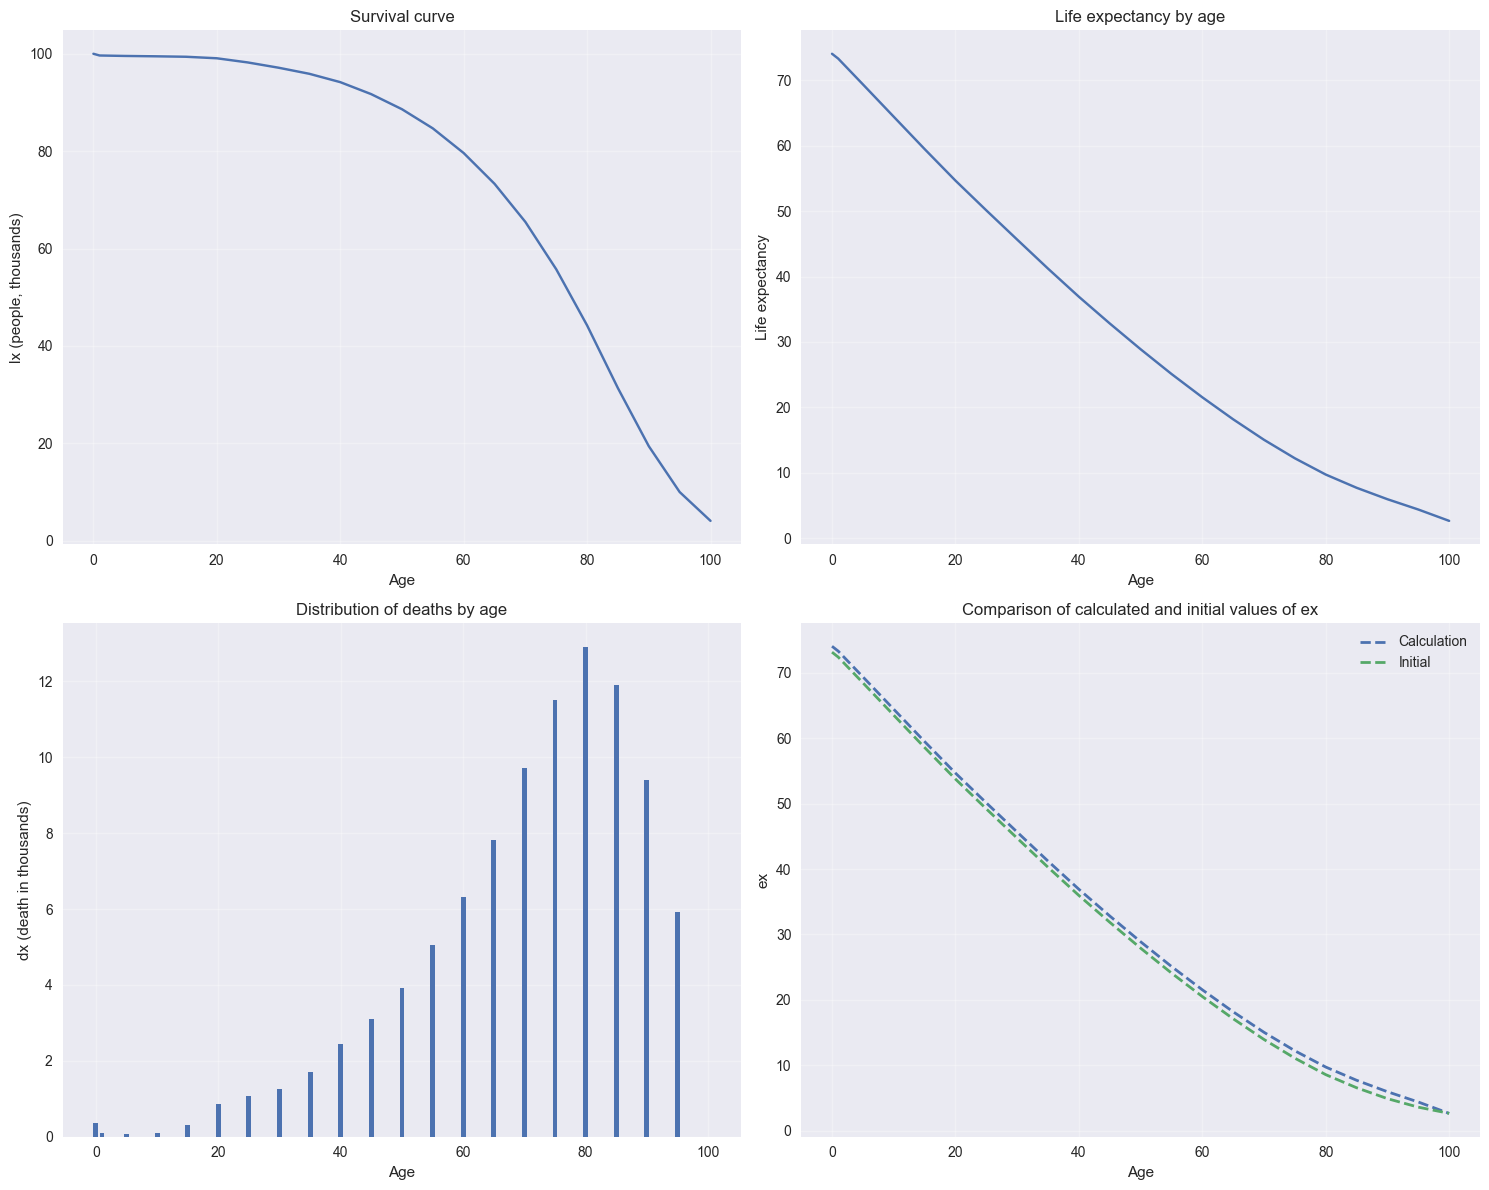

In [48]:
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Survival curve
axes[0,0].plot(df_example["AgeGrpStart"], df_example["lx_calc"] / 1000)
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('lx (people, thousands)')
axes[0,0].set_title('Survival curve')
axes[0,0].grid(True, alpha=0.3)

# Survival function
axes[0,1].plot(df_example["AgeGrpStart"], df_example["ex_calc"])
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Life expectancy')
axes[0,1].set_title('Life expectancy by age')
axes[0,1].grid(True, alpha=0.3)

# 3. Distribution of deaths (dx)
axes[1, 0].bar(df_example["AgeGrpStart"], df_example["dx_calc"] / 1000)
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('dx (death in thousands)')
axes[1,0].set_title('Distribution of deaths by age')
axes[1,0].grid(True, alpha=0.3)

# 4. Comparison of calculated and initial values of ex
axes[1,1].plot(df_example['AgeGrpStart'], df_example['ex_calc'], label='Calculation', linestyle='--', linewidth=2)
axes[1,1].plot(df_example['AgeGrpStart'], df_example['ex'], label='Initial', linestyle='--', linewidth=2)
axes[1,1].set_xlabel('Age')
axes[1,1].set_ylabel('ex')
axes[1,1].set_title('Comparison of calculated and initial values of ex')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Median age at death is the age at which 50% of the cohort remains
# <YOUR CODE>
print(f"Median age at death: {median_death_age} years")

plt.figure(figsize=(10, 6))
# <YOUR CODE>
plt.axhline(y=50000, color='red', linestyle='--', alpha=0.7, label='50% of the cohort')
plt.axvline(x=median_death_age, color='green', linestyle='--', alpha=0.7, label=f'Median death age: {median_death_age} years')
plt.xlabel('Age')
plt.ylabel('lx (number of survivors)')
plt.title('Median age at death')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Death rate

In [49]:
death = pd.read_csv("data/WPP2024_DeathsBySingleAgeSex_Medium_1950-2023.csv")
death.head()

/var/folders/50/qly_r7y17754hf5lyq92cnjh0000gn/T/ipykernel_88230/2950225642.py:1: DtypeWarning: Columns (2,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  death = pd.read_csv("data/WPP2024_DeathsBySingleAgeSex_Medium_1950-2023.csv")


,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,DeathMale,DeathFemale,DeathTotal
0,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,2,Medium,1950,1950.5,0,0,1,324.189,275.913,600.102
1,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,2,Medium,1950,1950.5,1,1,1,88.236,80.553,168.789
2,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,2,Medium,1950,1950.5,2,2,1,43.582,43.471,87.053
3,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,2,Medium,1950,1950.5,3,3,1,22.927,24.568,47.495
4,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,2,Medium,1950,1950.5,4,4,1,12.660,14.453,27.113


## Death rate table description

* SortOrder is the sequential number of the record (probably for sorting).
* LocID is the identifier of the location (country or region). Here 380 is the Italian code.
* Notes - notes (missing from the data).
* ISO3_code is a three-letter country code (ITA - Italy).
* ISO2_code is a two-letter country code (IT is Italy).
* SDMX_code is the code in the SDMX (Statistical Data and Metadata Exchange) format (380.0).
* LocTypeID is the type of location (4.0 is the country/territory).
* LocTypeName - the name of the location type (Country/Area).
* ParentID is the identifier of the parent location (925.0 is probably the area code of Italy).
* Location - the name of the location (Italy).
* VarID is the identifier of the variant (2 is probably the average forecast variant).
* Variant is the name of the variant (Medium is the average variant).
* Time is the year (1950, 1951, ... 2023).
* MidPeriod is the middle of the period (1950.5 - mid-1950).
* AgeGrp - age group code (0, 1, 2, ... 100+).
* AgeGrpStart - the beginning of the age range (0, 1, 2, ... 100).
* AgeGrpSpan is the length of the age range (1 year, except for the last group of 100+, where -1 stands, which probably means an open interval).
* DeathMale is the number of deaths of men (in thousands) in a given age group per year.
* DeathFemale is the number of deaths of women (in thousands) in a given age group per year.
* DeathTotal is the total number of deaths (in thousands) in a given age group per year.

In [50]:
death_it = death[death["ISO3_code"] == "ITA"]
death_it.head()

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,DeathMale,DeathFemale,DeathTotal
3333404,218.0,380,NaN,ITA,IT,380.0,4.0,Country/Area,925.0,Italy,2,Medium,1950,1950.5,0,0,1,32.079,26.366,58.445
3333405,218.0,380,NaN,ITA,IT,380.0,4.0,Country/Area,925.0,Italy,2,Medium,1950,1950.5,1,1,1,5.087,4.929,10.016
3333406,218.0,380,NaN,ITA,IT,380.0,4.0,Country/Area,925.0,Italy,2,Medium,1950,1950.5,2,2,1,1.840,1.600,3.440
3333407,218.0,380,NaN,ITA,IT,380.0,4.0,Country/Area,925.0,Italy,2,Medium,1950,1950.5,3,3,1,1.076,0.921,1.997
3333408,218.0,380,NaN,ITA,IT,380.0,4.0,Country/Area,925.0,Italy,2,Medium,1950,1950.5,4,4,1,0.661,0.630,1.291


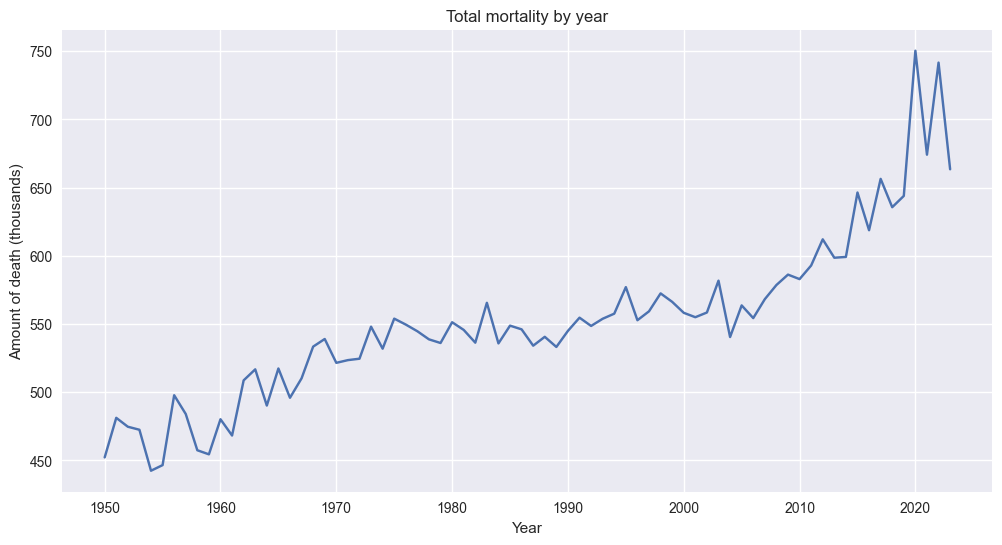

In [52]:
# Total mortality by year

yearly_mortality = death_it.groupby("Time")["DeathTotal"].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_mortality['Time'], yearly_mortality['DeathTotal'])
plt.title('Total mortality by year')
plt.xlabel('Year')
plt.ylabel('Amount of death (thousands)')
plt.grid(True)
plt.show()

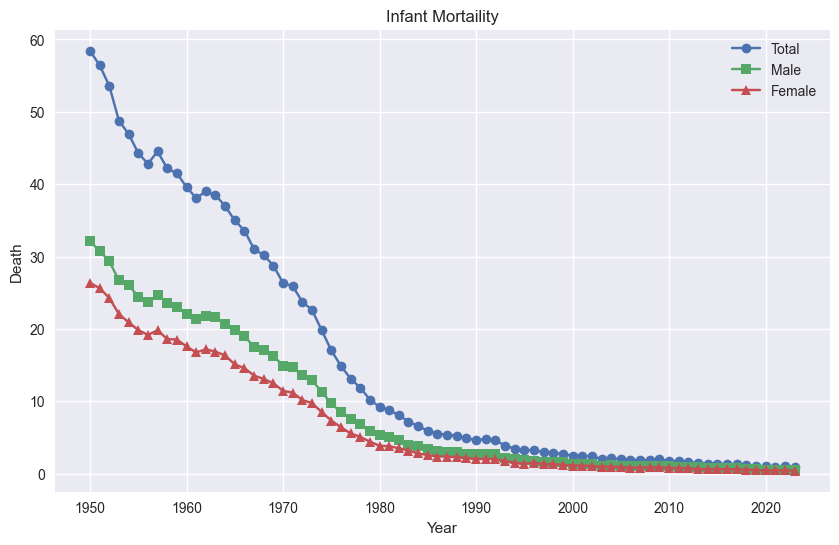

In [53]:
# infant mortality (age = 0)
# <YOUR CODE>
infant_mortality = death_it[death_it["AgeGrpStart"] == 0][["Time", "DeathTotal", "DeathMale", "DeathFemale"]]

plt.figure(figsize=(10, 6))
plt.plot(infant_mortality["Time"], infant_mortality["DeathTotal"], marker='o', label='Total')
plt.plot(infant_mortality["Time"], infant_mortality["DeathMale"], marker='s', label='Male')
plt.plot(infant_mortality["Time"], infant_mortality["DeathFemale"], marker='^', label='Female')
plt.title('Infant Mortaility')
plt.xlabel('Year')
plt.ylabel('Death')
plt.legend()
plt.grid(True)
plt.show()

# Linear regression


## Analysis of the influence of demographic indicators on mortality

### Formulation

* The aim of the study is to identify the **influence of previous values of demographic characteristics on the current mortality rate**, taking into account the specific features of each location.

# Hypothesis:

### Cohort Aging Effect
Past demographic indicators, reflecting population structure and reproduction, predict current mortality through the mechanism of cohort aging. Generations with low survival probabilities in the past are reaching older ages today, leading to an increase in the absolute number of deaths

### Health & Development Persistence
Past life expectancy reflects the quality of healthcare, level of development, and socioeconomic conditions of a location, which remain **relatively stable over time**. Locations with high life expectancy 5-15 years ago have better conditions, leading to **low current mortality**, even taking into account population aging.


## Assumptions

1. **Location fixed effects** -- each location has a **unique constant mortality rate**, determined by its geographic, medical, and social characteristics (climate, level of healthcare, genetic characteristics), which do not change over time.

2. **Strict exogeneity** -- lagged demographic indicators are uncorrelated with the model's errors. Assumption: past demographic characteristics influence mortality, but current mortality does not influence past indicators (logically, in the time direction).

3. **Linear dependence** -- the relationship between the features and the target is linear after taking into account lags.


In [60]:
target = "DeathTotal"
features = ["dx", "lx", "Lx", "Sx", "ex", "ax"]
time_column = "Time"
index_column = "Location"

## Join datasets

In [56]:
[i for i in common_columns if i != "Notes"]

['SortOrder',
 'LocID',
 'ISO3_code',
 'ISO2_code',
 'SDMX_code',
 'LocTypeID',
 'LocTypeName',
 'ParentID',
 'Location',
 'VarID',
 'Variant',
 'Time',
 'MidPeriod',
 'AgeGrp',
 'AgeGrpStart',
 'AgeGrpSpan']

In [57]:
list1 = df.columns.tolist()
list2 = death.columns.tolist()
common_columns = [col for col in list1 if col in list2]
df_lin_reg = pd.merge(df, death, on=[i for i in common_columns if i != "Notes"], how="inner")
print(df_lin_reg.shape)
df_lin_reg.head()

(104784, 34)


,Unnamed: 0,SortOrder,LocID,Notes_x,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,...,dx,Lx,Sx,Tx,ex,ax,Notes_y,DeathMale,DeathFemale,DeathTotal
0,1426128,64.0,108,NaN,BDI,BI,108.0,4.0,Country/Area,910.0,...,17238.006,88450.536,0.784065,3957135.380,39.5714,0.3300,NaN,9.492,8.285,17.777
1,1426149,64.0,108,NaN,BDI,BI,108.0,4.0,Country/Area,910.0,...,2.876,4.079,0.000000,4.079,1.4184,1.4184,NaN,0.000,0.001,0.001
2,1426150,64.0,108,NaN,BDI,BI,108.0,4.0,Country/Area,910.0,...,17064.669,88566.672,0.786264,3979062.200,39.7906,0.3300,NaN,10.162,8.828,18.990
3,1426171,64.0,108,NaN,BDI,BI,108.0,4.0,Country/Area,910.0,...,2.976,4.227,0.000000,4.227,1.4204,1.4204,NaN,0.000,0.001,0.001
4,1426172,64.0,108,NaN,BDI,BI,108.0,4.0,Country/Area,910.0,...,16893.886,88681.096,0.788471,4001895.539,40.0190,0.3300,NaN,10.129,8.793,18.923


## Data Cleaning

In [58]:
# Delete null observations
df_lin_reg = df_lin_reg[~df_lin_reg["ISO3_code"].isnull()]
df_lin_reg.shape

(104784, 34)

In [61]:
# Delete duplicates from data
df_lin_reg = df_lin_reg.drop_duplicates(subset=features)
print(df_lin_reg.shape)

(104741, 34)


# EDA

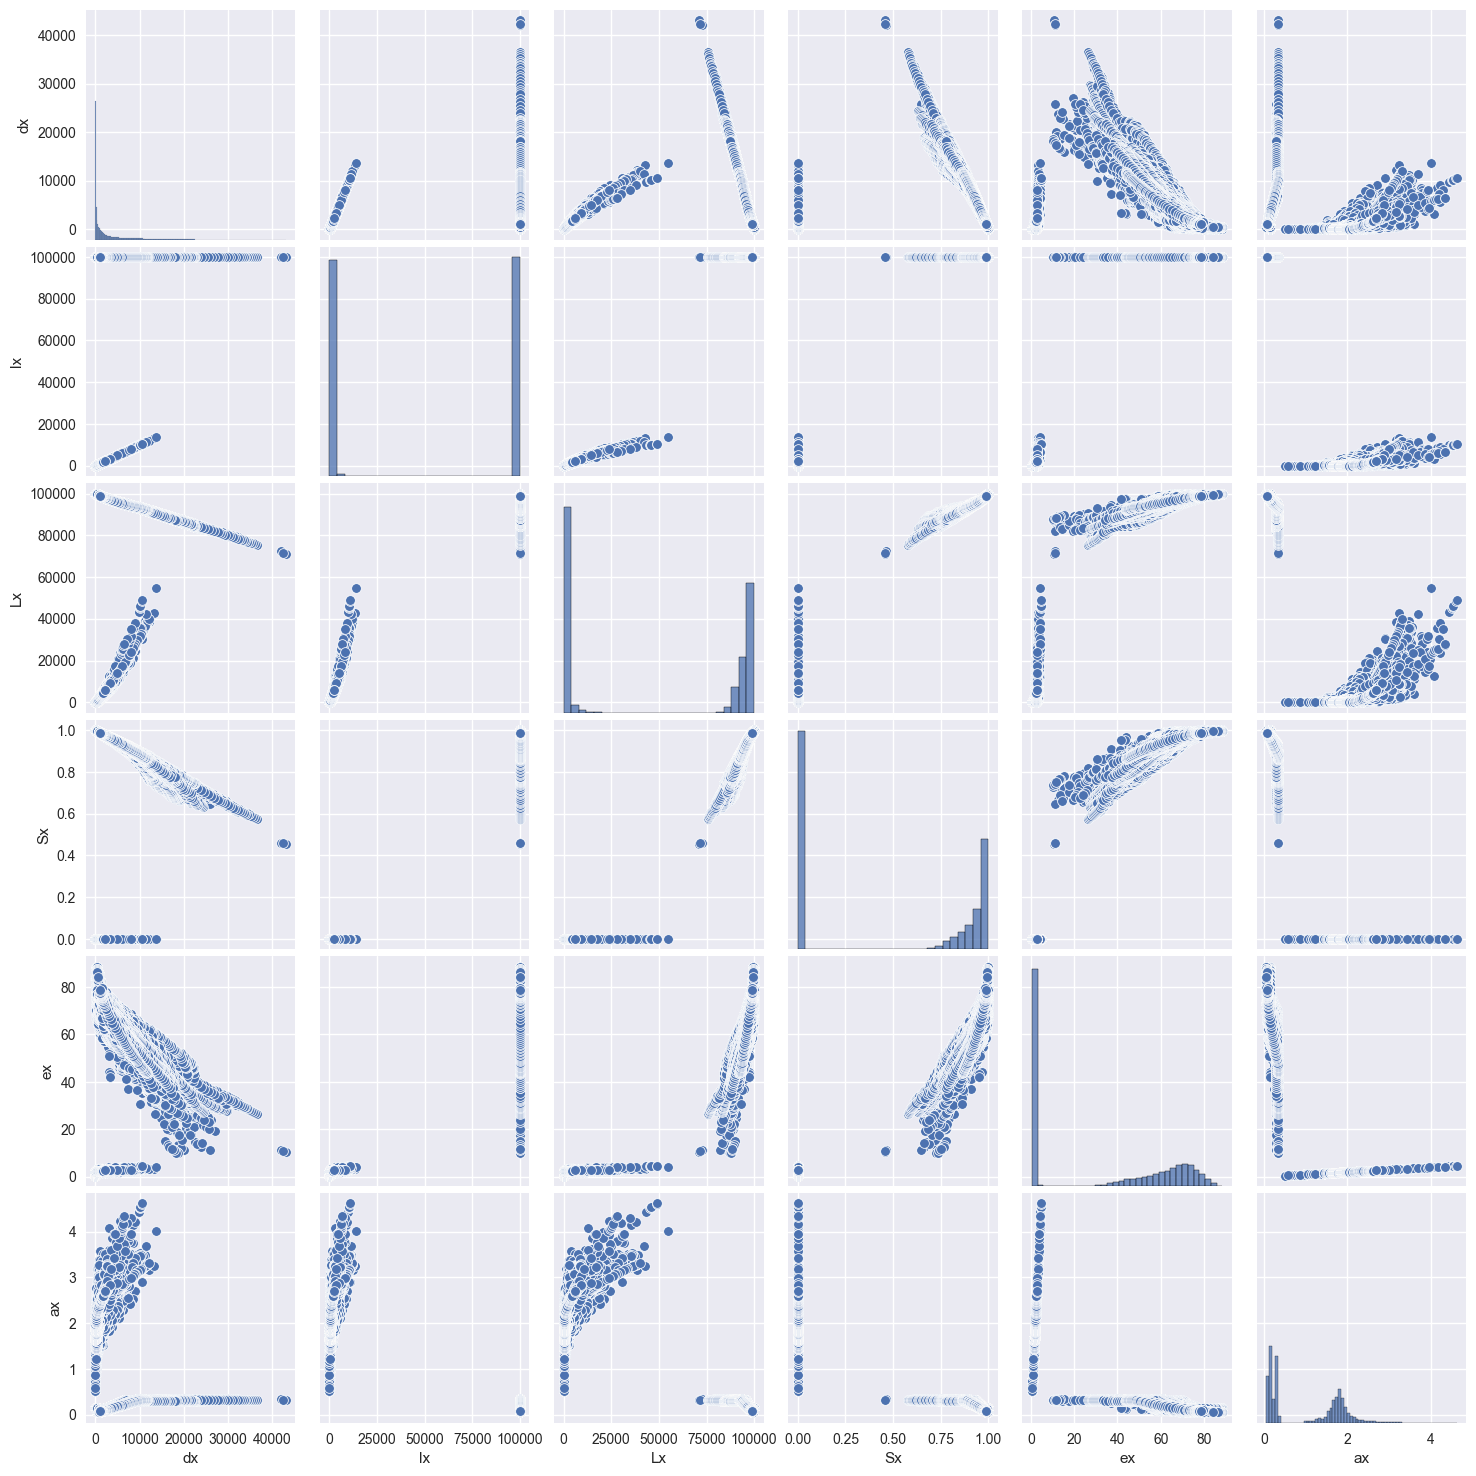

In [62]:
import seaborn as sns
# pairplot
sns.pairplot(df_lin_reg[features])

<Axes: >

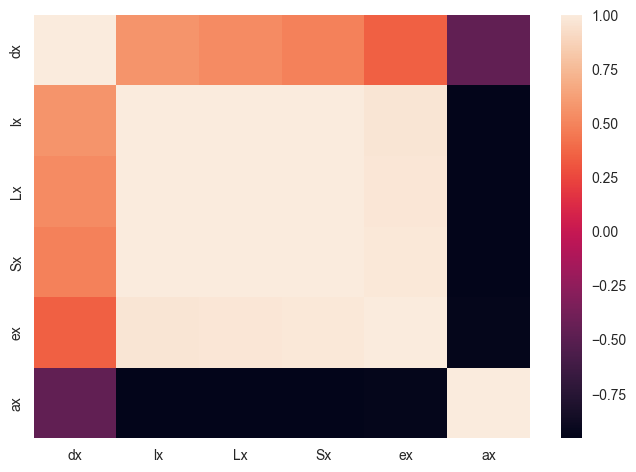

In [64]:
# correlation matrix
sns.heatmap(df_lin_reg[features].corr())

### Feature Engineering

In [65]:
def generate_lag_features(df, features, time_col, group_col, lags):
    df = df.sort_values([group_col, time_col]).copy()
    cols = []
    for feature in features:
        for lag in lags:
            lagged_col_name = f'{feature}_lag_{lag}'
            df[lagged_col_name] = df.groupby(group_col)[feature].shift(lag)
            cols.append(lagged_col_name)
    return df, cols


lags = [5, 10, 15]
df_new, new_features = generate_lag_features(df_lin_reg, features, time_column, index_column, lags)
df_new = df_new.dropna(subset=new_features)

In [66]:
df_new

,Unnamed: 0,SortOrder,LocID,Notes_x,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,...,Lx_lag_15,Sx_lag_5,Sx_lag_10,Sx_lag_15,ex_lag_5,ex_lag_10,ex_lag_15,ax_lag_5,ax_lag_10,ax_lag_15
31233,1813657,143.0,4,NaN,AFG,AF,4.0,4.0,Country/Area,5501.0,...,80049.159,0.672881,0.000000,0.656015,28.5836,1.5435,27.5467,0.330000,1.543500,0.330000
31380,1815264,143.0,4,NaN,AFG,AF,4.0,4.0,Country/Area,5501.0,...,0.539,0.000000,0.661139,0.000000,1.5234,27.9711,1.5069,1.523400,0.330000,1.506900
31381,1815285,143.0,4,NaN,AFG,AF,4.0,4.0,Country/Area,5501.0,...,82687.232,0.666248,0.000000,0.680493,28.3940,1.5064,28.8345,0.330000,1.506400,0.350000
31086,1812030,143.0,4,NaN,AFG,AF,4.0,4.0,Country/Area,5501.0,...,1.552,0.000000,0.685080,0.000000,1.5037,29.2748,1.5810,1.503700,0.350000,1.581000
31087,1812051,143.0,4,NaN,AFG,AF,4.0,4.0,Country/Area,5501.0,...,81132.267,0.689601,0.000000,0.668104,29.7139,1.5889,28.1563,0.350000,1.588900,0.330000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8583,1520551,83.0,716,NaN,ZWE,ZW,716.0,4.0,Country/Area,910.0,...,96959.290,0.963597,0.000000,0.958266,64.5438,1.7192,61.5300,0.168264,1.719200,0.148376
8730,1522158,83.0,716,NaN,ZWE,ZW,716.0,4.0,Country/Area,910.0,...,151.399,0.000000,0.959417,0.000000,2.1494,60.1347,1.8224,2.149400,0.145311,1.822400
8731,1522179,83.0,716,NaN,ZWE,ZW,716.0,4.0,Country/Area,910.0,...,96764.452,0.960228,0.000000,0.956222,62.3601,1.7069,57.7174,0.142896,1.706900,0.157751
8878,1523786,83.0,716,NaN,ZWE,ZW,716.0,4.0,Country/Area,910.0,...,31.201,0.000000,0.957143,0.000000,2.1143,59.8805,1.6560,2.114300,0.155108,1.656000


In [67]:
## Delete high correlated features

def remove_correlated_features(df, features, corr_threshold=0.9):
    corr_matrix = df[features].corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > corr_threshold)]
    return [f for f in features if f not in to_drop]

new_features_3 = remove_correlated_features(df_new, new_features, corr_threshold=0.75)


In [68]:
new_features_3

['dx_lag_5', 'dx_lag_10', 'lx_lag_5']

# Model

In [69]:
# OLS

import statsmodels.api as sm

Y = df_new[target]
X = df_new[new_features_3]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DeathTotal   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1746.
Date:                Wed, 12 Nov 2025   Prob (F-statistic):               0.00
Time:                        19:50:16   Log-Likelihood:            -6.4150e+05
No. Observations:              101201   AIC:                         1.283e+06
Df Residuals:                  101197   BIC:                         1.283e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0411      0.899      0.046      0.964      -1.721       1.803
dx_lag_5       0.0003      0.000      2.785      0.005    9.69e-05       0.001
dx_lag_10      0.0067      0.000     57.805      0.000       0.006       0.007
lx_lag_5   -4.109e-05   1.18e-05     -3.469      0.001   -6.43e-05   -1.79e-05
==============================================================================
Omnibus:                   204812.941   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        476001106.674
Skew:                          17.106   Prob(JB):                         0.00
Kurtosis:                     337.236   Cond. No.                     1.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
# Fixed Effects
from linearmodels.panel import PanelOLS

df_new_panel = df_new.set_index(['Location', 'Time'])
y = df_new_panel['DeathTotal']
X = df_new_panel[new_features]

X = sm.add_constant(X)

model = PanelOLS(y, X, entity_effects=True)
results = model.fit()

results.summary


Dep. Variable:,DeathTotal,R-squared:,0.0656
Estimator:,PanelOLS,R-squared (Between):,0.0277
No. Observations:,101201,R-squared (Within):,0.0656
Date:,"Wed, Nov 12 2025",R-squared (Overall):,0.0509
Time:,20:01:28,Log-likelihood,-6.159e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,393.65
Entities:,236,P-value,0.0000
Avg Obs:,428.82,Distribution:,"F(18,100947)"
Min Obs:,417.00,,
Max Obs:,429.00,F-statistic (robust):,393.65
